# 4_9_Intro_to_Data_Visualization_with_Python_Part_2_2

### This script contains the following points:

### 1. Importing Libraries

### 2. Import Database

### 3. Sampling Data

### 4. Create a bar chart from the “loyalty_flag” column

### 5. Check for differences in expenditure depending on the hour of the day

### 6. Connection between age and family situation

### 7.Connection between age and spending power (income) - Scatter Plot

### 8. Export your visualizations as “.png” files in your relevant project folder.

# 1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Import Database

In [ ]:
path = r'/content/drive/MyDrive/Careerfoundary'

In [ ]:
df_ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','orders_product_customer_merge_sample.pkl'))

In [ ]:
df_ords_prods_cust_merge.shape


(2771091, 34)

# 3. Sampling Data

In [ ]:
# Gives each row a boolean of true or false, depending on the assigned number.
# If the assigned number is less than or equal to 0.7 then the boolean shows TRUE or else FALSE
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_cust_merge)) <= 0.7

In [ ]:
# Store 70% of the sample in dataframe big

big = df_ords_prods_cust_merge[dev]

In [ ]:
# Store 30% of the sample in dataframe big

small = df_ords_prods_cust_merge[~dev]

In [ ]:
# Lets check the sample dataframes big and small add up to df_ord_prods_merge in terms of length

In [ ]:
len(df_ords_prods_cust_merge)

2771091

In [ ]:
len(big) + len(small)

2771091

In [ ]:
# We only need columns orders_day_of_week and prices from small

df_2 = small[['orders_day_of_week','prices']]

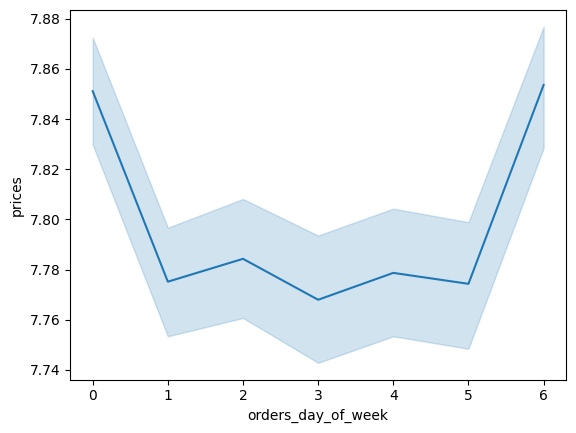

In [ ]:
# Create the line chart from df_2 dataframe

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# 4. Create a bar chart from the “loyalty_flag” column

The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [ ]:
df_ords_prods_cust_merge.columns

Index(['user_id', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'marital_status', 'income', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'first_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest_Days(plural)', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_price', 'spending_flag', 'customer_frequency',
       'frequency_flag', '_merge'],
      dtype='object')

In [ ]:
# Use a sample of only the columns needed
sample = df_ords_prods_cust_merge[['loyalty_flag']]

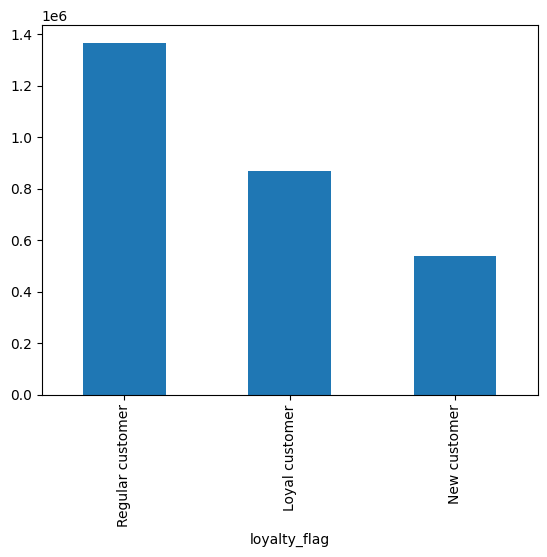

In [ ]:
bar = sample['loyalty_flag'].value_counts().plot.bar()

# 5. Check for differences in expenditure depending on the hour of the day

 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [ ]:
# Use a sample of only the columns needed
sample_2 = df_ords_prods_cust_merge[['order_hour_of_day','prices']]

In [ ]:
sample_2

,order_hour_of_day,prices
0,12,9.601562
1,9,13.898438
2,16,7.000000
3,14,8.796875
4,10,12.296875
...,...,...
2771086,8,13.500000
2771087,12,3.400391
2771088,9,10.101562
2771089,9,2.800781


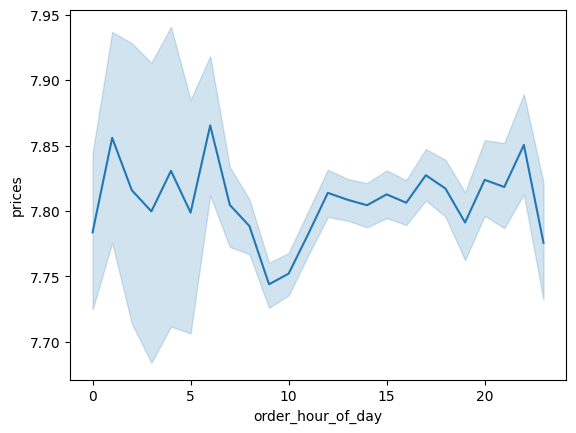

In [ ]:
# This dataframe is already a sample due to RAM issues

line_2 = sns.lineplot(data = df_ords_prods_cust_merge, x = 'order_hour_of_day',y = 'prices')

# 6. Connection between age and family situation

Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.


In [ ]:
# Use a sample of only the columns needed
sample_3 = df_ords_prods_cust_merge[['age','n_dependants']]

In [ ]:
sample_3

,age,n_dependants
0,60,1
1,60,1
2,60,1
3,60,1
4,60,1
...,...,...
2771086,74,1
2771087,74,1
2771088,74,1
2771089,74,1


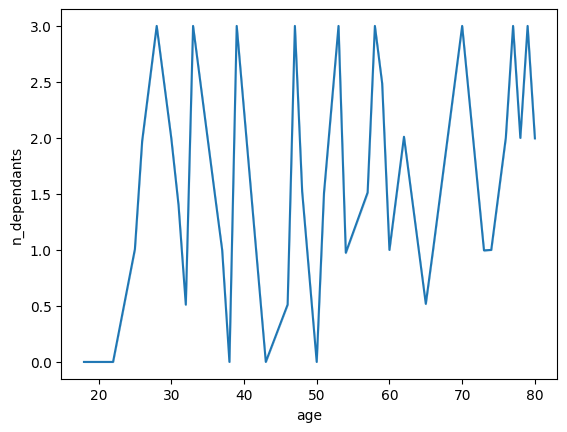

In [ ]:
line_3 = sns.lineplot(data = sample_3, x = 'age', y = 'n_dependants')

In [ ]:
# There does not seem to be any relationship between age and number of dependants

# 7. Connection between age and spending power (income) - Scatter Plot

Use the sns.scatterplot() function.


In [ ]:
# Reduce to a sample of only the columns needed
sample_4 = df_ords_prods_cust_merge[['age','income']]

In [ ]:
sample_4

,age,income
0,60,50952
1,60,50952
2,60,50952
3,60,50952
4,60,50952
...,...,...
2771086,74,58007
2771087,74,58007
2771088,74,58007
2771089,74,58007


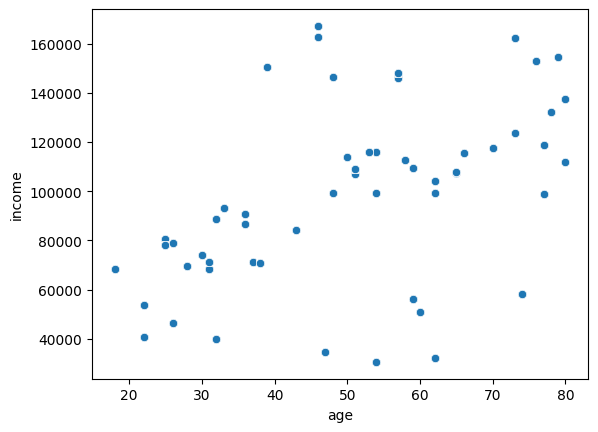

In [ ]:

scatterplot = sns.scatterplot(x = 'age', y = 'income',data = sample_4)

 As I was only able to use a sample of the dataframe, we are able to see more clearly there is some positive correlation between age and income. The older the age, the higher the income. It could however also be argued that income does vary quite a bit across all age ranges therefore it may be more informative to conduct some statistical analysis for example a t-test, to see if the rise income is associated with age.


# 8. Export your visualizations as “.png” files in your relevant project folder.

In [ ]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_day_of_week.png'))

In [ ]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [ ]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_of_day.png'))

In [ ]:
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [ ]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))